# Load model and predicted

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/destree.pkl', 'rb') as model_file:
    destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/ranfor.pkl', 'rb') as model_file:
    ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/gbc.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/xgb.pkl', 'rb') as model_file:
    xgb = pickle.load(model_file)

In [3]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_destree.pkl', 'rb') as model_file:
    p_test_destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_ranfor.pkl', 'rb') as model_file:
    p_test_ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_gbc.pkl', 'rb') as model_file:
    p_test_gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_xgb.pkl', 'rb') as model_file:
    p_test_xgb = pickle.load(model_file)

# Load Test Data

In [4]:
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

data_test_attack = data_test[data_test['label'] == 1]

# Encode Test Data

In [5]:
le = LabelEncoder()
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_11432\2007079091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_11432\2007079091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_11432\2007079091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

# Model Evaluation

In [6]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
precision = []
recall = []
f1_score = []


#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    precision.append(round(b, 5))
    recall.append(round(c, 5))
    f1_score.append(round(d, 5))

In [7]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_test, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing precision score
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing recall score
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing f1 score
    f1_score_test = 2 * (precision_score_test * recall_score_test) / (precision_score_test + recall_score_test)
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, precision_score_test, recall_score_test, f1_score_test)

## Prepare X_test and y_test

In [8]:
#Prepare X_test and y_test
X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_test.shape, y_test.shape

((45332, 38), (45332,))

## Training, Testing, Evaluation

### Decision Tree

In [9]:
#call report function
model_report(str(destree), y_test, p_test_destree)

Model:DecisionTreeClassifier(max_depth=11)

Accuracy on test Data: 0.77702

Precision on test Data: 0.54535

Recall score on test Data: 0.49251

F1 score on test Data: 0.51759

Classification Report
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       677
           1       0.07      0.21      0.11       583
           2       0.48      0.08      0.14      4089
           3       0.61      0.85      0.71     11132
           4       0.86      0.65      0.74      6062
           5       1.00      0.97      0.98     18871
           6       0.94      0.80      0.86      3496
           7       0.40      0.73      0.52       378
           8       0.55      0.14      0.22        44

    accuracy                           0.78     45332
   macro avg       0.55      0.49      0.48     45332
weighted avg       0.80      0.78      0.77     45332



### Random Forest

In [10]:
#call report function
model_report(str(ranfor), y_test, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=17)

Accuracy on test Data: 0.76829

Precision on test Data: 0.55178

Recall score on test Data: 0.49539

F1 score on test Data: 0.52206

Classification Report
              precision    recall  f1-score   support

           0       0.02      0.03      0.02       677
           1       0.02      0.09      0.03       583
           2       0.47      0.15      0.22      4089
           3       0.66      0.77      0.71     11132
           4       0.87      0.69      0.77      6062
           5       1.00      0.97      0.98     18871
           6       0.92      0.80      0.86      3496
           7       0.38      0.69      0.49       378
           8       0.63      0.27      0.38        44

    accuracy                           0.77     45332
   macro avg       0.55      0.50      0.50     45332
weighted avg       0.81      0.77      0.78     45332



### Gradient Boosting

In [11]:
#call report function
model_report(str(gbc), y_test, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on test Data: 0.74916

Precision on test Data: 0.55407

Recall score on test Data: 0.47886

F1 score on test Data: 0.51373

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.33      0.05      0.08       583
           2       0.66      0.05      0.10      4089
           3       0.77      0.69      0.73     11132
           4       0.90      0.73      0.80      6062
           5       1.00      0.97      0.98     18871
           6       0.28      0.89      0.42      3496
           7       0.40      0.54      0.46       378
           8       0.65      0.39      0.49        44

    accuracy                           0.75     45332
   macro avg       0.55      0.48      0.45     45332
weighted avg       0.81      0.75      0.74     45332



### XGBoost

In [12]:
#call report function
model_report(str(xgb), y_test, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on test Data: 0.79288

Precision on test Data: 0.56679

Recall score on test Data: 0.53997

F1 score on test Data: 0.55306

Classification Report
              precision    recall  f1-score   support

           0    

# Result

## Comparison of Models

In [13]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'F1 Score' : f1_score,
                       'Recall' : recall,
                       'Precision' : precision
                       })
result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,DecisionTreeClassifier(max_depth=11),0.77702,0.51759,0.49251,0.54535
1,RandomForestClassifier(n_estimators=17),0.76829,0.52206,0.49539,0.55178
2,GradientBoostingClassifier(),0.74916,0.51373,0.47886,0.55407
3,"XGBClassifier(base_score=None, booster=None, c...",0.79288,0.55306,0.53997,0.56679


In [14]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['Recall'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.79288,0.55306,0.53997,0.56679
1,RandomForestClassifier(n_estimators=17),0.76829,0.52206,0.49539,0.55178
2,DecisionTreeClassifier(max_depth=11),0.77702,0.51759,0.49251,0.54535
3,GradientBoostingClassifier(),0.74916,0.51373,0.47886,0.55407


## Confusion Matrix

In [15]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [16]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

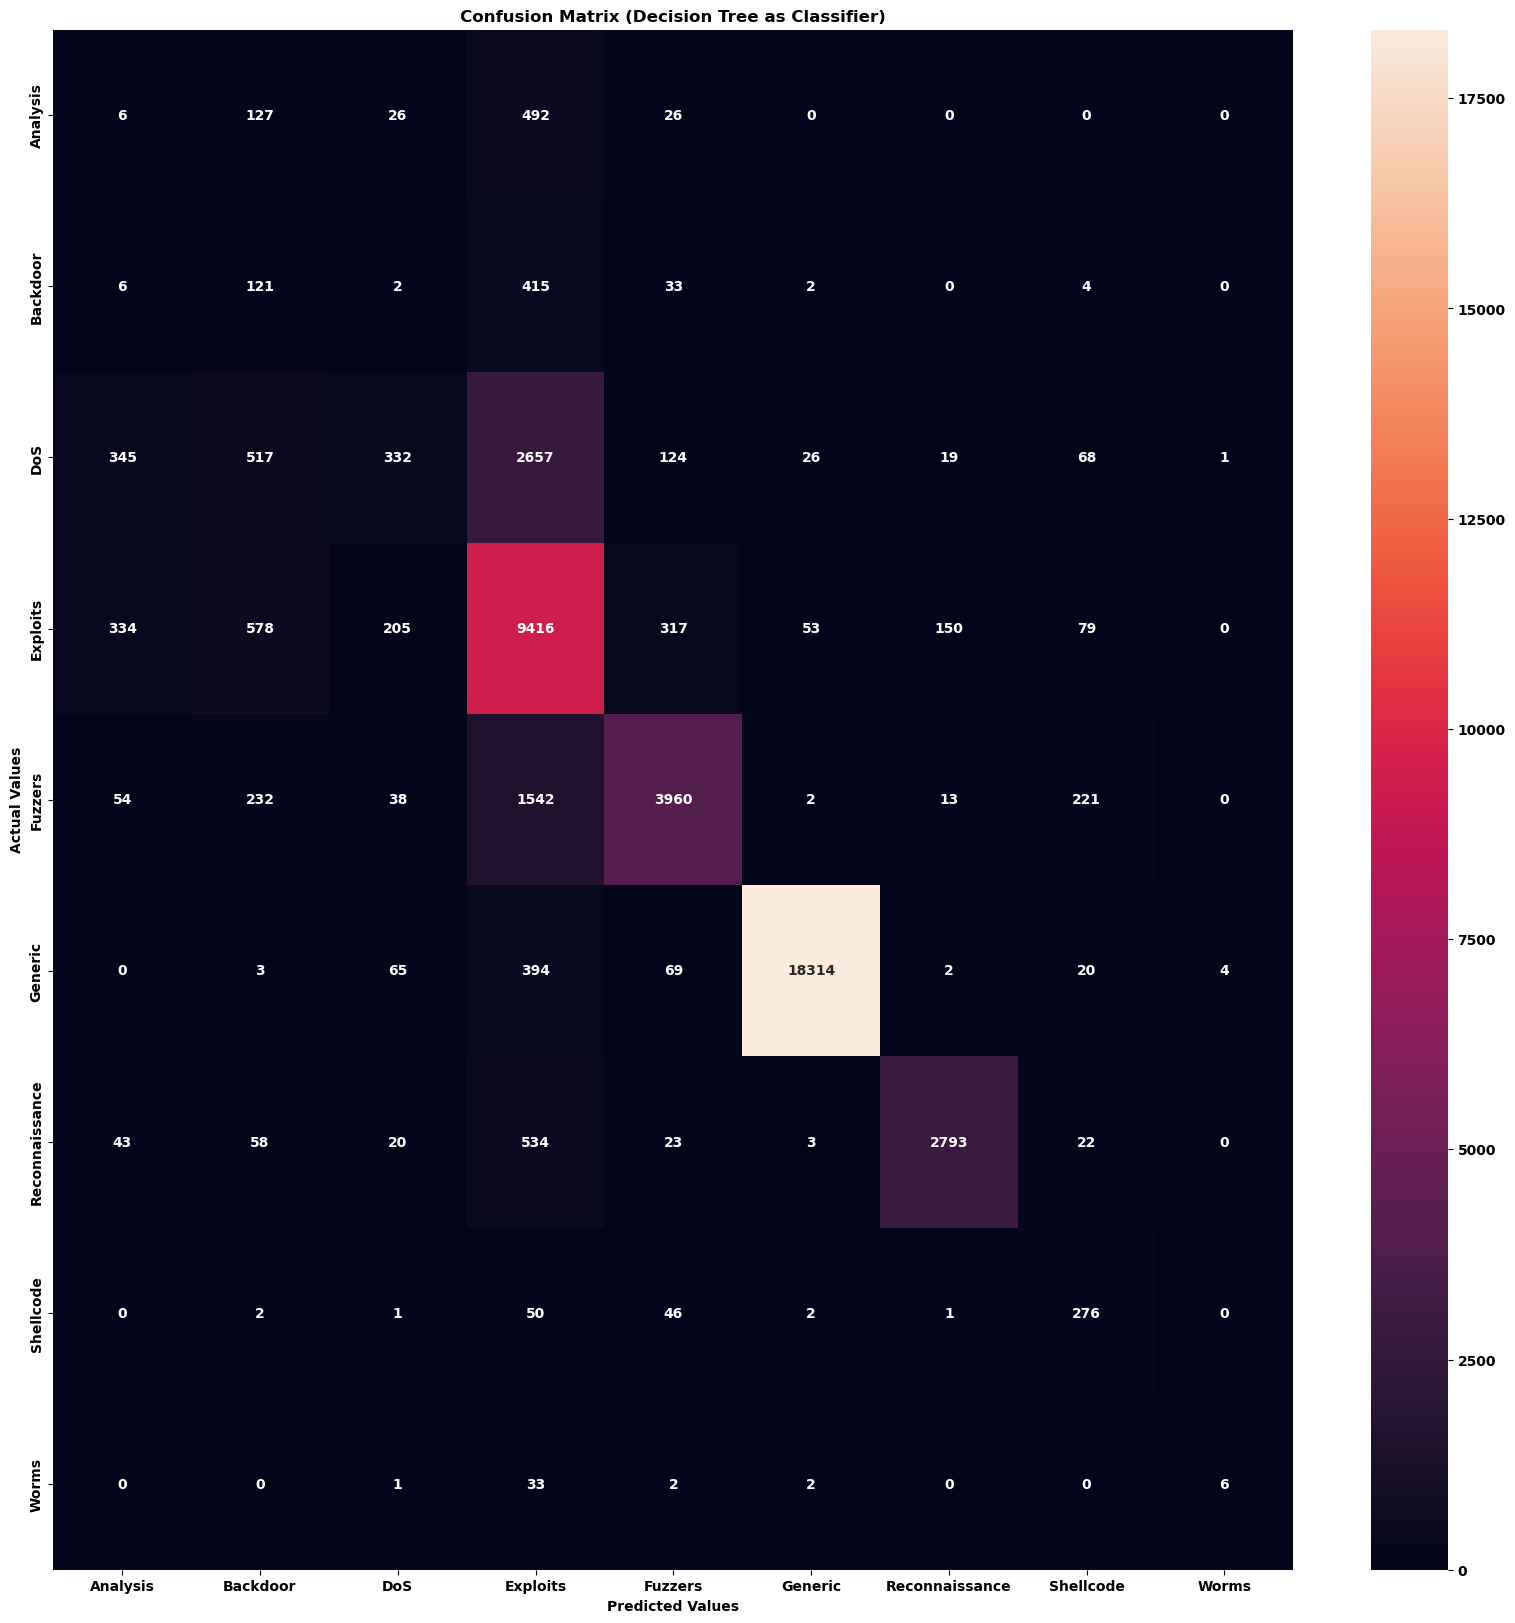

In [18]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.008862629246676515
Backdoor: 0.20754716981132076
DoS: 0.08119344583027635
Exploits: 0.8458498023715415
Fuzzers: 0.6532497525569119
Generic: 0.9704838111387843
Reconnaissance: 0.7989130434782609
Shellcode: 0.7301587301587301
Worms: 0.13636363636363635


### Random Forest

In [20]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

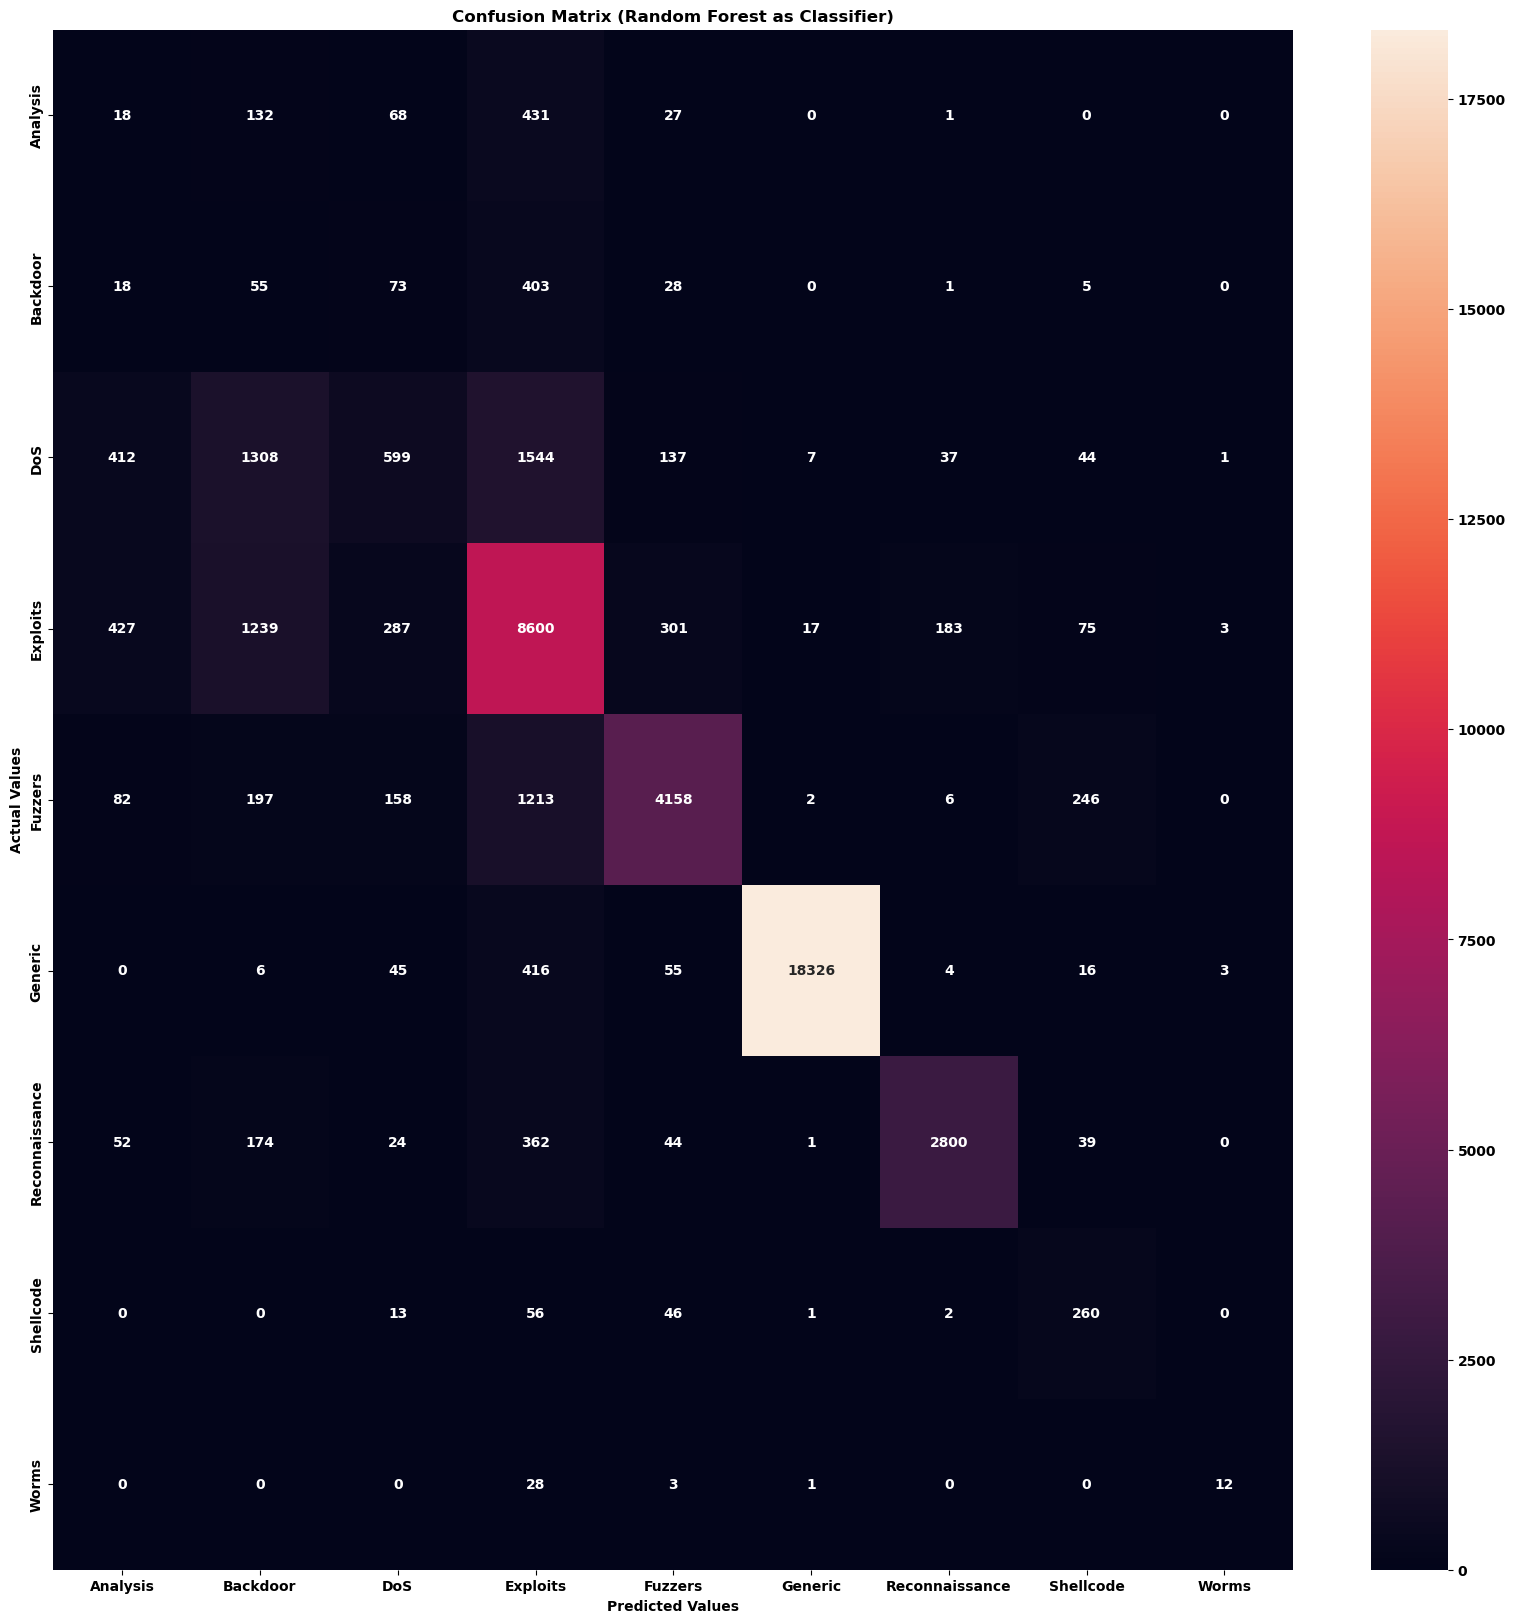

In [21]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.026587887740029542
Backdoor: 0.09433962264150944
DoS: 0.14649058449498656
Exploits: 0.7725476104922745
Fuzzers: 0.6859122401847575
Generic: 0.9711197074876795
Reconnaissance: 0.8009153318077803
Shellcode: 0.6878306878306878
Worms: 0.2727272727272727


### Gradient Boosting

In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

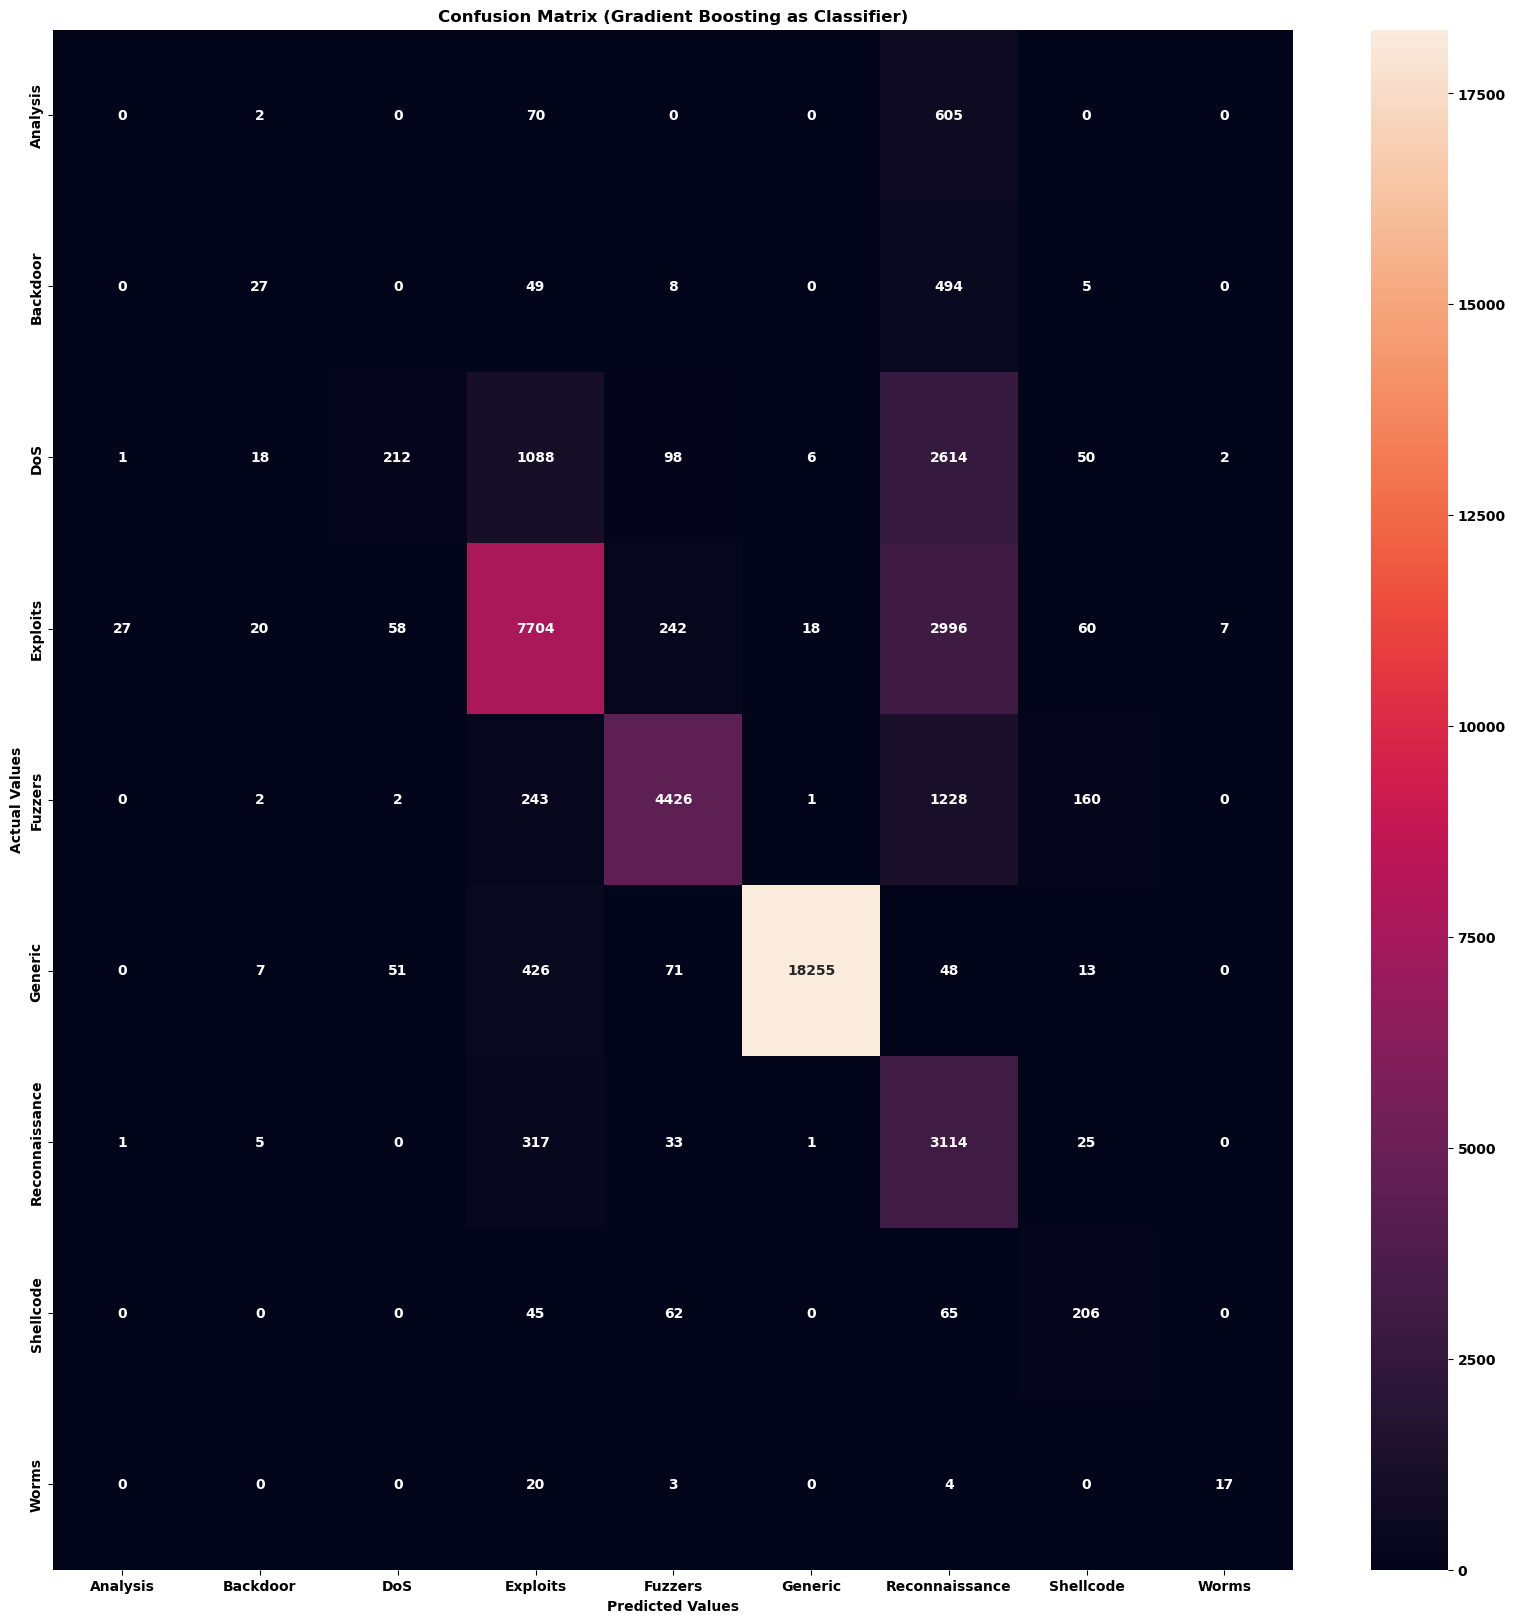

In [24]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [25]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.04631217838765009
DoS: 0.05184641721692345
Exploits: 0.6920589292130794
Fuzzers: 0.7301220719234576
Generic: 0.9673573207567167
Reconnaissance: 0.8907322654462243
Shellcode: 0.544973544973545
Worms: 0.38636363636363635


### XGBoost

In [26]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

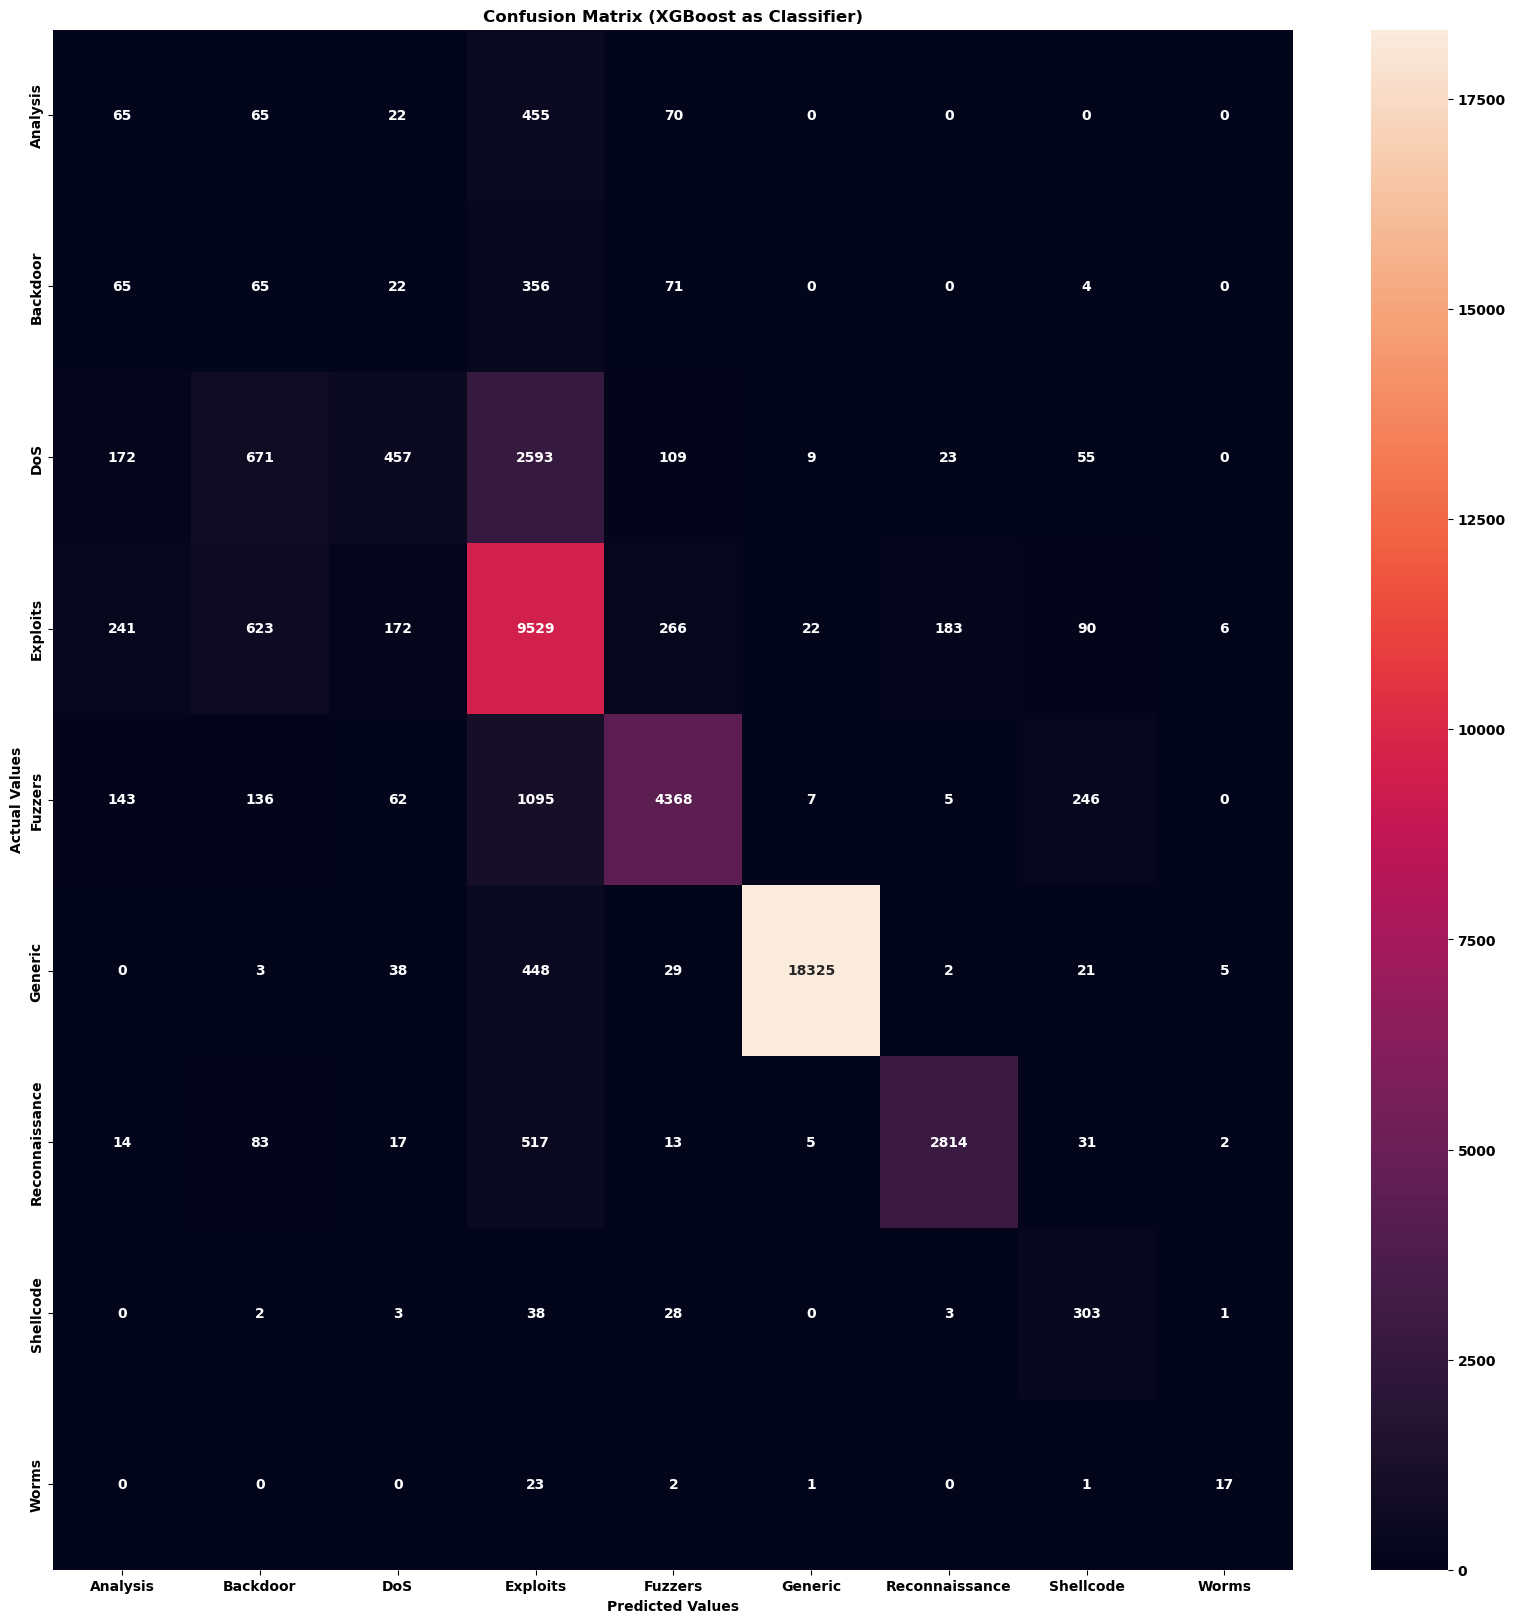

In [27]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.09601181683899557
Backdoor: 0.11149228130360206
DoS: 0.11176326730251895
Exploits: 0.85600071864894
Fuzzers: 0.7205542725173211
Generic: 0.9710667161252716
Reconnaissance: 0.8049199084668193
Shellcode: 0.8015873015873016
Worms: 0.38636363636363635
